In [2]:
# setup
%matplotlib notebook
# set this to your working directory
WORKING_DIR = '/home/elliott/Dropbox/_Ash_Teaching/2018-09 - Bocconi - Text Data and ML/code'
import os
os.chdir(WORKING_DIR)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

X = pd.read_pickle('X.pkl').toarray()
vocab = pd.read_pickle('vocab.pkl')
df1 = pd.read_csv('death-penalty-cases.csv')
Y = df1['citeCount'] > 0

In [3]:
# Getting started with Keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential() # create a sequential model
model.add(Dense(50, # output neurons in layer       
          input_dim=X.shape[1], # number of inputs
          activation='relu')) # activation function
model.add(Dense(50, activation='relu')) # hidden layer
model.add(Dense(1, activation='sigmoid')) # output layer
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                23650     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 26,251
Trainable params: 26,251
Non-trainable params: 0
_________________________________________________________________


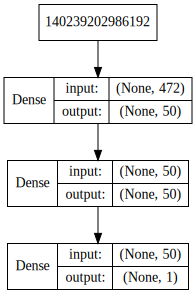

In [4]:
# Visualize a model

# Requires graphviz
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
dot = model_to_dot(model,
                   show_shapes=True,
                   show_layer_names=False)
SVG(dot.create(prog='dot', format='svg'))

In [5]:
# fit the model
model.compile(loss='binary_crossentropy', # cost function
              optimizer='adam', # use adam as the optimizer
              metrics=['accuracy']) # compute accuracy, for scoring

model_info = model.fit(X, Y, 
                      epochs=5,
                      validation_split=.2)

Train on 26053 samples, validate on 6514 samples
Epoch 1/5
26053/26053 [==============================] - 1s 52us/step - loss: 0.4115 - acc: 0.8377 - val_loss: 0.9883 - val_acc: 0.4391
Epoch 2/5
26053/26053 [==============================] - 1s 43us/step - loss: 0.3641 - acc: 0.8510 - val_loss: 0.9798 - val_acc: 0.4595
Epoch 3/5
26053/26053 [==============================] - 1s 42us/step - loss: 0.3410 - acc: 0.8598 - val_loss: 1.0745 - val_acc: 0.4605
Epoch 4/5
26053/26053 [==============================] - 1s 42us/step - loss: 0.3163 - acc: 0.8707 - val_loss: 1.0628 - val_acc: 0.4779
Epoch 5/5
26053/26053 [==============================] - 1s 42us/step - loss: 0.2925 - acc: 0.8794 - val_loss: 1.0893 - val_acc: 0.4616


In [6]:
# these are the learned coefficients
model.get_weights()

[array([[ 0.04205895, -0.19235775,  0.16381547, ...,  0.13097143,
         -0.10757669, -0.06343485],
        [-0.0154818 ,  0.10795801, -0.06713986, ...,  0.13765265,
         -0.0760218 ,  0.11365304],
        [-0.08925527, -0.05972265, -0.1198267 , ...,  0.03329436,
          0.03714103, -0.08996543],
        ..., 
        [-0.02414128, -0.05419866,  0.1074783 , ...,  0.07116157,
          0.13102327, -0.06698783],
        [-0.13835816,  0.22714548,  0.01513391, ..., -0.26537031,
          0.11230265, -0.08572137],
        [ 0.0185053 , -0.00393265,  0.00060195, ..., -0.01832603,
          0.16872266, -0.10818721]], dtype=float32),
 array([ 0.06898604, -0.05041382,  0.01189239, -0.05587853, -0.13650438,
         0.04522034,  0.01265864,  0.1336392 ,  0.11105922,  0.16152769,
        -0.0522863 ,  0.0005071 ,  0.02709965,  0.03233713, -0.1445483 ,
         0.04732233,  0.05017491,  0.09581093, -0.07859965, -0.03202565,
         0.02046425, -0.1647443 ,  0.06471384,  0.10062558,  0.13

<IPython.core.display.Javascript object>


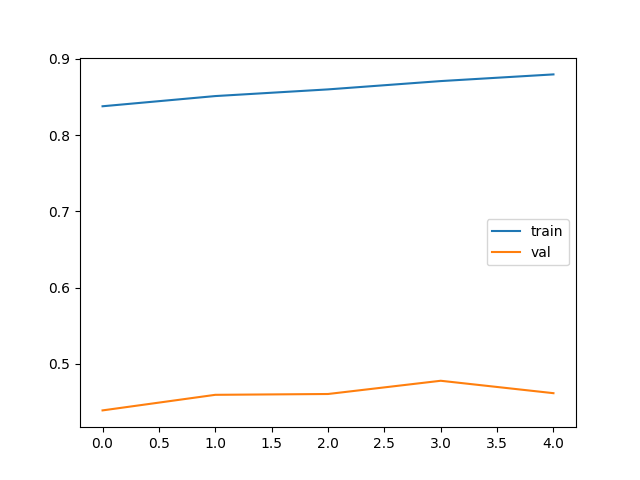

In [7]:
# Plot performance by epoch
plt.plot(model_info.epoch,model_info.history['acc'])
plt.plot(model_info.epoch,model_info.history['val_acc'])
plt.legend(['train', 'val'], loc='best')

In [8]:
# form probability distribution over classes
Ypred_prob = model.predict(X)
Ypred = Ypred_prob > .5

In [9]:
# Save a model
model.save('keras-clf.pkl')

In [10]:
# load model
from keras.models import load_model
model = load_model('keras-clf.pkl')

In [11]:
# Regression model with R-squared
Yreg = np.log(1+df1['citeCount'])
model = Sequential() # create a sequential model
model.add(Dense(50, # output neurons in layer       
          input_dim=X.shape[1], # number of inputs
          activation='relu')) # activation function
model.add(Dense(50, activation='relu')) # hidden layer
model.add(Dense(1)) # output layer

from keras import backend as K
def r2(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

model.compile(loss='mean_squared_error', # cost function
              optimizer='adam', # use adam as the optimizer
              metrics=[r2]) # compute r-squared
model_info = model.fit(X[:15000], Yreg[:15000], 
                      epochs=3)

from sklearn.metrics import r2_score
Ypred = model.predict(X[15000:])
r2_score(Yreg[15000:],Ypred[:,0])

Epoch 1/3
15000/15000 [==============================] - 1s 47us/step - loss: 2.0544 - r2: -0.5187
Epoch 2/3
15000/15000 [==============================] - 1s 37us/step - loss: 1.2862 - r2: 0.0828
Epoch 3/3
15000/15000 [==============================] - 1s 35us/step - loss: 1.1967 - r2: 0.1425


-2.901496442589198